## Importing Libraries

In [5]:
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from tensorflow.keras.layers import LSTM, Dense, Dropout, GlobalMaxPooling1D, Bidirectional, Embedding

## Importing Dataset

In [3]:
train_set_path = '/kaggle/input/ag-news/train.csv'
test_set_path = '/kaggle/input/ag-news/test.csv'

In [4]:
train_set = pd.read_csv(train_set_path)
test_set = pd.read_csv(test_set_path)

In [8]:
train_set.head()

,ClassIndex,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [9]:
test_set.head()

,ClassIndex,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


## Setting Columns

In [14]:
train_set.columns = ['ClassIndex', 'Title', 'Description']
test_set.columns = ['ClassIndex', 'Title', 'Description']

#Combine Title and Description
X_train = train_set['Title'] + " " + train_set['Description'] # Combine title and description (better accuracy than using them as separate features)
y_train = train_set['ClassIndex'].apply(lambda x: x-1).values # Class labels need to begin from 0

X_test = test_set['Title'] + " " + test_set['Description'] # Combine title and description (better accuracy than using them as separate features)
y_test = test_set['ClassIndex'].apply(lambda x: x-1).values # Class labels need to begin from 0

#Max Length of sentences in Train Dataset
maxlen = X_train.map(lambda x: len(x.split())).max()

In [15]:
X_train.head()

0    Wall St. Bears Claw Back Into the Black (Reute...
1    Carlyle Looks Toward Commercial Aerospace (Reu...
2    Oil and Economy Cloud Stocks' Outlook (Reuters...
3    Iraq Halts Oil Exports from Main Southern Pipe...
4    Oil prices soar to all-time record, posing new...
dtype: object

In [16]:
X_test.head()

0    Fears for T N pension after talks Unions repre...
1    The Race is On: Second Private Team Sets Launc...
2    Ky. Company Wins Grant to Study Peptides (AP) ...
3    Prediction Unit Helps Forecast Wildfires (AP) ...
4    Calif. Aims to Limit Farm-Related Smog (AP) AP...
dtype: object

In [18]:
print(y_train)

[2 2 2 ... 1 1 1]


In [19]:
print(y_test)

[2 3 3 ... 1 2 2]


## Data Distribution

**Train set**

<AxesSubplot:xlabel='ClassIndex', ylabel='count'>

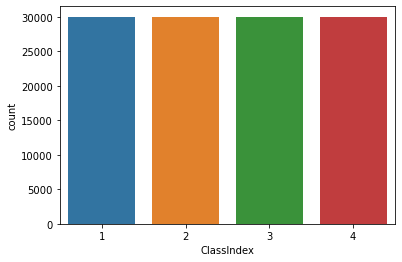

In [20]:
sns.countplot(x=train_set['ClassIndex'])

**Test set**

<AxesSubplot:xlabel='ClassIndex', ylabel='count'>

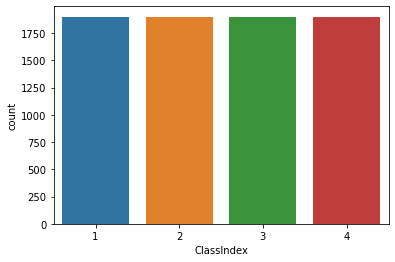

In [21]:
sns.countplot(x=test_set['ClassIndex'])

## Checking Missing Values

In [22]:
train_set.isnull().sum()

ClassIndex     0
Title          0
Description    0
dtype: int64

In [23]:
test_set.isnull().sum()

ClassIndex     0
Title          0
Description    0
dtype: int64

## Tokenization